The sparsity level of MovieLens100K is 98.36%
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99
i = 100
i = 101
i = 102
i = 103
i = 104
i = 105
i = 106
i = 107
i = 108
i = 109
i = 110
i = 111
i = 112
i = 113
i = 114
i = 115
i = 116
i = 117
i = 118
i = 119
i = 120
i = 121
i = 122
i = 123
i = 124
i = 125
i = 126
i = 127
i = 128
i = 129
i = 130
i = 131
i = 132


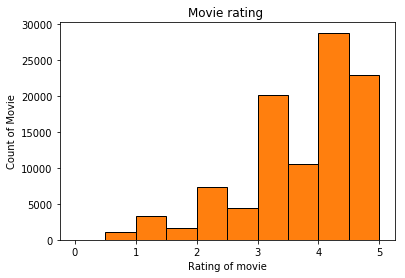

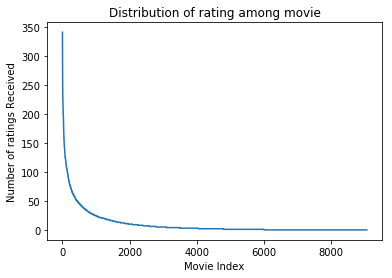

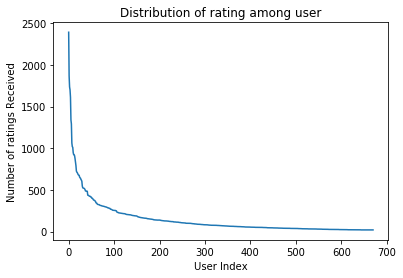

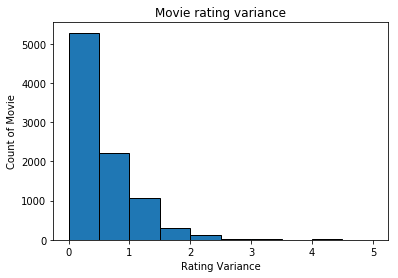

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import defaultdict


file_path = os.path.expanduser('ratings.csv')
dataset = pd.read_csv(file_path, delimiter=',')
# dataset.iloc[0,1]
dat_mat = dataset.copy()

# R data frame
R_df = dat_mat.pivot_table('rating', 'userId', 'movieId', fill_value=0)
# R matrix
R = pd.DataFrame.as_matrix(R_df)

# column name(movie ID), rows(User ID)
movieId_uni = list(R_df)
userId_uni = list(R_df.index)

# Q1
# total available rating = 10004, total possible rating = R(len) * R(width)
sparsity = round(1 - len(dat_mat) / np.prod(R.shape), 4)
print('The sparsity level of MovieLens100K is ' +  str(sparsity*100) + '%')

# Q2
bar_add = np.zeros((1,10))
for i in np.arange(R.shape[0]):
    bar = plt.hist(R[i,:], bins=[0.01, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],ec='black')[0]
    bar_add += bar
    print('i = %d' %i)
pass
plt.plot(np.array([[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]]), bar_add)
rating_all = [0.8] * int(bar_add[0,1]) + [1.3] * int(bar_add[0,2]) + \
 [1.8]* int(bar_add[0,3]) +[2.3] * int(bar_add[0,4])+[2.8] * int(bar_add[0,5])+ \
 [3.3]* int(bar_add[0,6])+ [3.8]* int(bar_add[0,7])+[4.3] * int(bar_add[0,8])+ \
 [4.8]* int(bar_add[0,9])
plt.hist(rating_all, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], ec='black')
plt.title("Movie rating ")
plt.xlabel("Rating of movie")
plt.ylabel("Count of Movie")
plt.show()

# Q3
dist_movie = np.sum(R!=0, axis=0)
dist_movie_copy = dist_movie.copy()

dist_movie_sort = sorted(dist_movie_copy)[::-1]
dist_movie_idx = np.argsort(dist_movie_copy)[::-1]
real_movie_idx = []

for i in range(len(dist_movie_idx)):
    real_movie_idx.append(movieId_uni[dist_movie_idx[i]])
pass
dist_movie_idx_str= []
for i in range(len(dist_movie_idx)):
    dist_movie_idx_str.append(str(real_movie_idx[i]))
pass
plt.plot(dist_movie_sort)
plt.title("Distribution of rating among movie")
plt.xlabel("Movie Index")
plt.ylabel("Number of ratings Received")
plt.show()

# Q4
dist_user = np.sum(R!=0, axis=1)
dist_user_copy = dist_user.copy()
dist_user_sort = sorted(dist_user_copy)[::-1]
dist_user_idx = np.argsort(dist_user_copy)[::-1]
real_user_idx = []
for i in range(len(dist_user_idx)):
    real_user_idx.append(userId_uni[dist_user_idx[i]])
pass
plt.plot(dist_user_sort)
plt.title("Distribution of rating among user")
plt.xlabel("User Index")
plt.ylabel("Number of ratings Received")
plt.show()

# Q6
R_df_na = dat_mat.pivot_table('rating', 'userId', 'movieId') # no rating as nan
var_movie = np.var(R_df_na, axis=0)
plt.hist(var_movie, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], ec='black')
plt.title("Movie rating variance")
plt.xlabel("Rating Variance")
plt.ylabel("Count of Movie")
plt.show()
